In [478]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import sklearn

from math import ceil
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn import preprocessing



In [479]:
d=pd.read_csv('/Users/Bernardo/Dropbox/Aprendizaje/MaterialyTareas/datos/RegLin.csv')

In [486]:
X_train, X_test, y_train, y_test = train_test_split(pd.DataFrame(d['X']), pd.DataFrame(d['y']), test_size=0.33, random_state=42)


normalizer = preprocessing.StandardScaler()
normalizer.fit(X_train)
X_train = pd.DataFrame(normalizer.transform(X_train))
X_test = pd.DataFrame(normalizer.transform(X_test))

normalizer.fit(y_train)
y_train = pd.DataFrame(normalizer.transform(y_train))
y_test = pd.DataFrame(normalizer.transform(y_test))

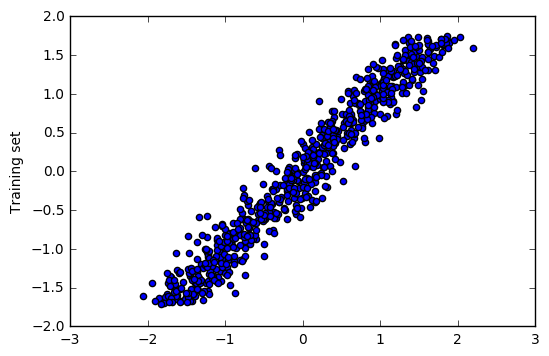

In [487]:


plt.scatter( y_train, X_train)
plt.ylabel('Training set')
plt.show()

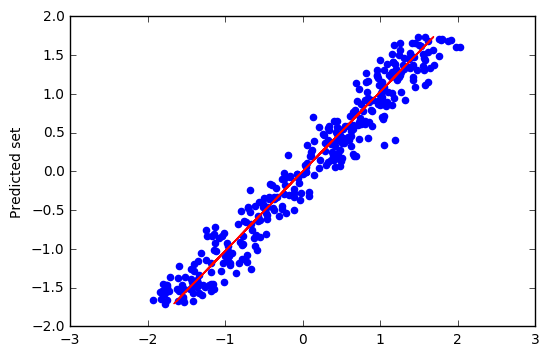

In [497]:
reg=LinearRegression()
reg.fit(X_train, y_train)
y_predict=reg.predict(X_test)
plt.plot( y_predict, X_test, color='red')
plt.scatter( y_test, X_test, color='blue')
plt.ylabel('Predicted set')
plt.show()

In [500]:
a=reg.intercept_[0]
b=reg.coef_[0][0]
print a
print b

-1.0666446531e-16
0.97287024552


In [256]:
def predictionreg(X, a, b):
    X2=a+b*X
    return pd.DataFrame(X2).rename(index=str, columns={"X": "y"})

def errori(Y1, Y2):
    return np.sum((Y1.values-Y2.values)**2)

In [167]:
error=[]
down=[]
miny=errori(y_test, predictionreg(X_test, 100, 100))
minx=100
for bt in range( int(ceil(-b)*1000), int(ceil(2*b)*1000), int(5*b)):
    br=bt/1000.0
    error.append(errori(y_test, predictionreg(X_test, a, br)))
    down.append(br)
    if errori(y_test, predictionreg(X_test, a, br))<miny:
        miny=errori(y_test, predictionreg(X_test, a, br))
        minx=br
    


minimum is 0.612
real minimum is 0.603818770858


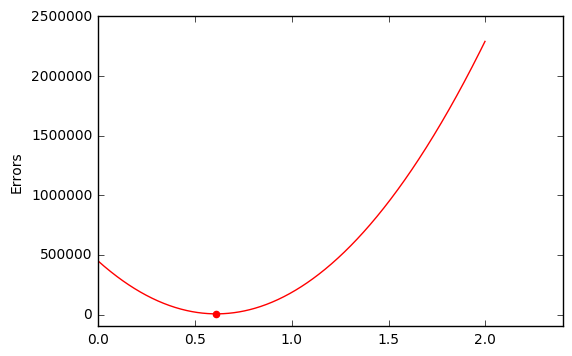

In [379]:
print "minimum is "+str(minx)
print "real minimum is "+str(b)

plt.plot(  down, error, color='red')
plt.scatter(  minx, miny, color='red')

plt.axis([0, 2.4, -100000, 2500000])
plt.ylabel('Errors')
plt.show()

In [484]:
def gd(a, b,lr, X, y):
    bi=b+X*lr*(y-(a+b*X))
    a=a+1*lr*(y-(a+b*X))
    return a, bi

In [524]:
a2=500
b2=500

print "We want a="+str(a)+" and b="+str(b)
i=0

for j in range(600):
    for k in range(len(X_train.values)):
        [a2, b2]=gd(a2, b2, 0.1*(0.9995)**k, X_train.values[k][0], y_train.values[k][0])
        i=i+1
print "With degradation we got want a="+str(a2)+" and b="+str(b2)


a2=500
b2=500


i=0
for j in range(600):

    for k in range(len(X_train.values)):
        [a2, b2]=gd(a2, b2, 0.1, X_train.values[k][0], y_train.values[k][0])
        i=i+1
    
print "With LR=0.1 we got want a="+str(a2)+" and b="+str(b2)


We want a=-1.0666446531e-16 and b=0.97287024552
With degradation we got want a=0.00870976194387 and b=0.97177638265
With LR=0.1 we got want a=0.0417254002383 and b=0.979711109367
